In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 경로 설정
file_path = 'Platinum_Sales.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# DataFrame의 열을 중앙 정렬하여 출력
styled_df = df.style.set_properties(**{'text-align': 'center'})

# Jupyter Notebook에서 DataFrame을 중앙 정렬된 형태로 출력
styled_df

,게임명,장르,TGA 수상 여부,판매량,출시 연도,프랜차이즈
0,Far Cry 3,1인칭 슈팅 게임,No,10000000,2012,Far Cry
1,Dark Souls 3,액션 RPG,No,10000000,2016,Dark Souls
2,Ghost Recon Wildlands,전술 슈팅 게임,No,10000000,2017,Tom Clancy's Ghost Recon
3,Assassin's Creed Unity,액션 어드벤처,No,10000000,2014,Assassin's Creed
4,Far Cry 4,1인칭 슈팅 게임,No,10000000,2014,Far Cry
5,Rainbow Six Siege,전술 슈팅 게임,No,10000000,2015,Rainbow Six
6,Watch Dogs 2,액션 어드벤처,No,10000000,2016,Watch Dogs
7,Assassin's Creed Origins,액션 RPG,No,10000000,2017,Assassin's Creed
8,Assassin's Creed Odyssey,액션 RPG,No,10000000,2018,Assassin's Creed
9,The Division 2,3인칭 슈팅 게임,No,10000000,2019,Tom Clancy's The Division


In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

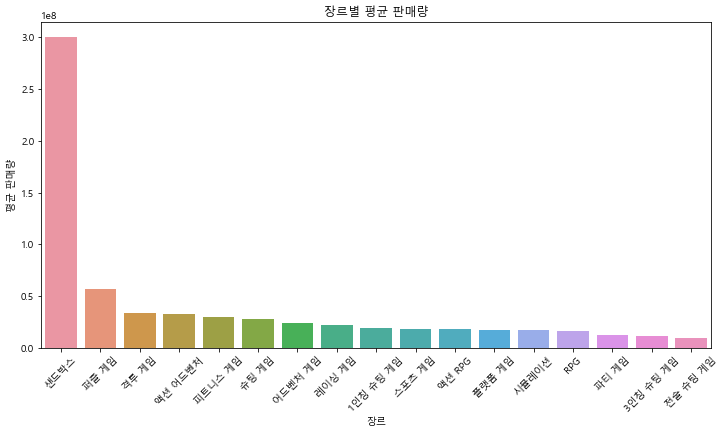

In [3]:
# 장르별 평균 판매량 계산
genre_sales = df.groupby('장르')['판매량'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.xticks(rotation=45)
plt.title('장르별 평균 판매량')
plt.xlabel('장르')
plt.ylabel('평균 판매량')
plt.show()

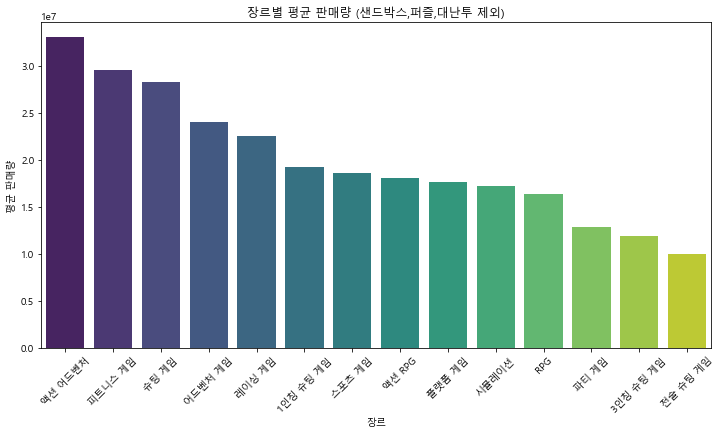

In [4]:
# '샌드박스' 장르를 제외한 데이터 필터링
df_filtered = df[(df['장르'] != '샌드박스') & (df['장르'] != '퍼즐 게임') & (df['게임명'] != 'Super Smash Bros Ultimate')]

# 장르별 평균 판매량 계산
genre_sales_filtered = df_filtered.groupby('장르')['판매량'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales_filtered.index, y=genre_sales_filtered.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('장르별 평균 판매량 (샌드박스,퍼즐,대난투 제외)')
plt.xlabel('장르')
plt.ylabel('평균 판매량')
plt.show()

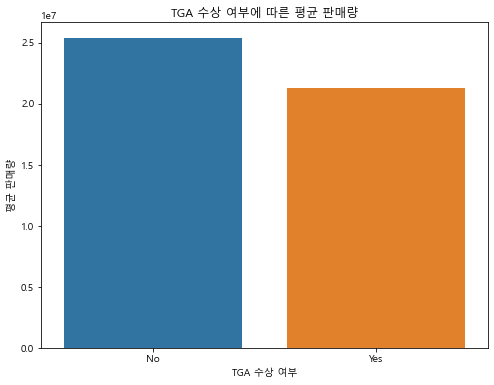

In [5]:
# TGA 수상 여부와 판매량 분석
tga_sales = df.groupby('TGA 수상 여부')['판매량'].mean()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=tga_sales.index, y=tga_sales.values)
plt.title('TGA 수상 여부에 따른 평균 판매량')
plt.xlabel('TGA 수상 여부')
plt.ylabel('평균 판매량')
plt.show()

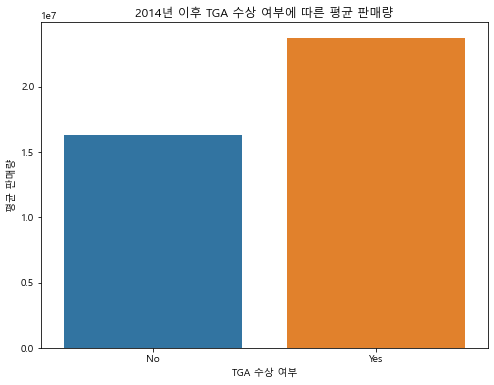

In [6]:
# 2014년 이후 출시된 게임으로 데이터 필터링
df_filtered = df[df['출시 연도'] >= 2014]

# TGA 수상 여부와 판매량 분석 (필터링된 데이터)
tga_sales_filtered = df_filtered.groupby('TGA 수상 여부')['판매량'].mean()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=tga_sales_filtered.index, y=tga_sales_filtered.values)
plt.title('2014년 이후 TGA 수상 여부에 따른 평균 판매량')
plt.xlabel('TGA 수상 여부')
plt.ylabel('평균 판매량')
plt.show()

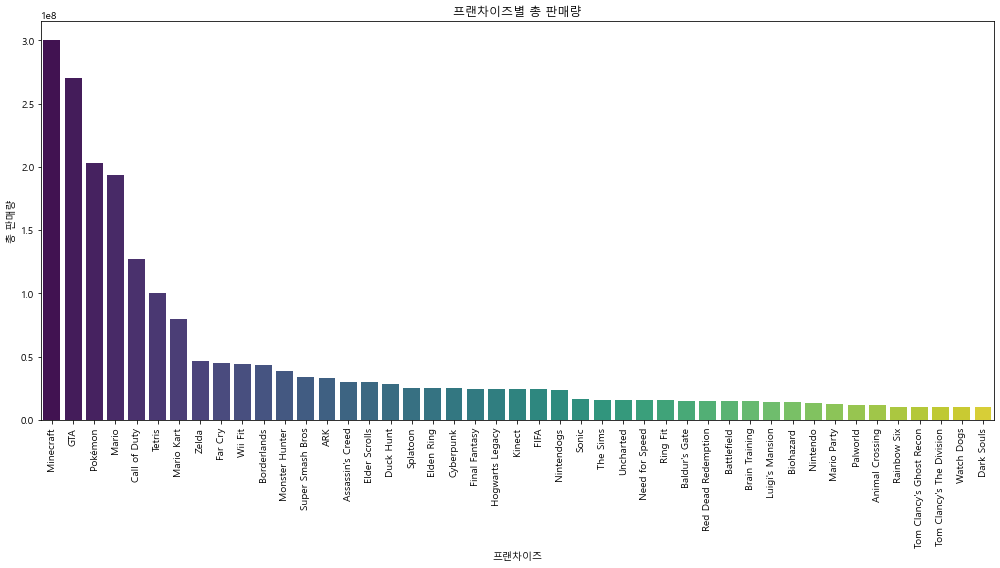

In [7]:
# 프랜차이즈별 판매량 총합 계산
franchise_sales = df.groupby('프랜차이즈')['판매량'].sum().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x=franchise_sales.index, y=franchise_sales.values, palette='viridis')
plt.xticks(rotation=90)  # 프랜차이즈 이름이 길 수 있으므로 회전
plt.title('프랜차이즈별 총 판매량')
plt.xlabel('프랜차이즈')
plt.ylabel('총 판매량')
plt.tight_layout()  # 레이아웃 조정
plt.show()

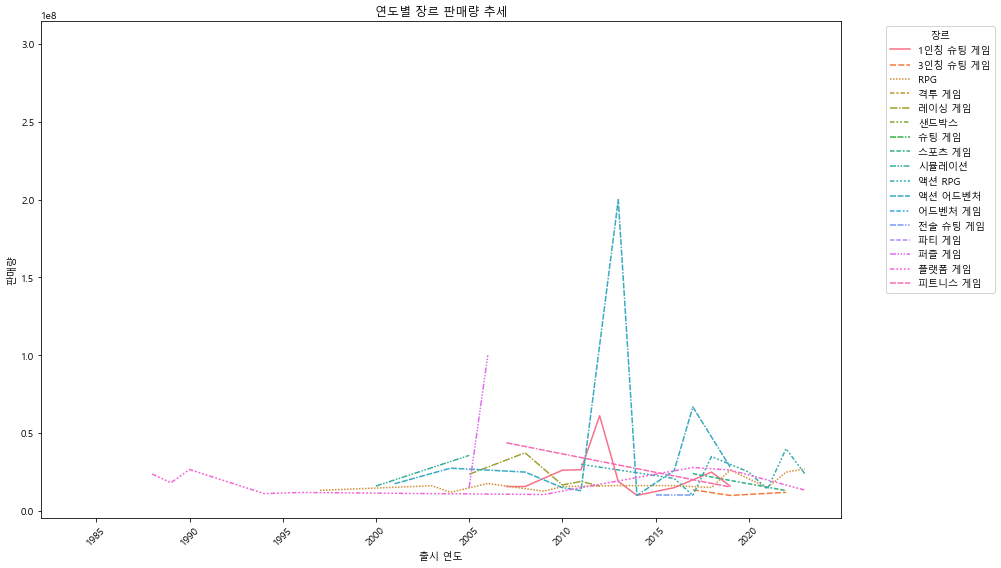

In [8]:
# 연도별 장르별 판매량 분석
# 연도별, 장르별로 판매량의 합계를 계산
yearly_genre_sales = df.groupby(['출시 연도', '장르'])['판매량'].sum().unstack()

# 시각화
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_genre_sales)
plt.title('연도별 장르 판매량 추세')
plt.xlabel('출시 연도')
plt.ylabel('판매량')
plt.legend(title='장르', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()  # 레이아웃 조정
plt.show()

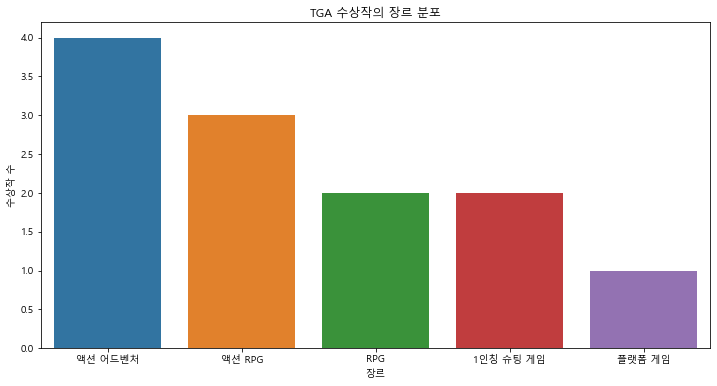

In [9]:
# TGA 수상작의 장르 분포 분석
tga_genre_distribution = df[df['TGA 수상 여부'] == 'Yes']['장르'].value_counts()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=tga_genre_distribution.index, y=tga_genre_distribution.values)
plt.title('TGA 수상작의 장르 분포')
plt.xlabel('장르')
plt.ylabel('수상작 수')
plt.show()

C:\Users\kjm\AppData\Local\Temp/ipykernel_2712/3383583920.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TGA 수상 여부(수치화)'] = df_filtered['TGA 수상 여부'].map({'Yes': 1, 'No': 0})


TGA 수상 여부와 판매량의 상관관계 (2014년 이후 출시작): 0.361
p-value: 0.020


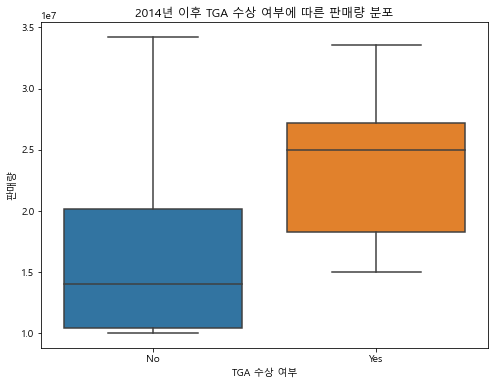

In [10]:
import scipy.stats as stats

# 2014년 이후 출시된 게임으로 데이터 필터링
df_filtered = df[df['출시 연도'] >= 2014]

# 'TGA 수상 여부'를 0과 1로 변환 (Yes: 1, No: 0)
df_filtered['TGA 수상 여부(수치화)'] = df_filtered['TGA 수상 여부'].map({'Yes': 1, 'No': 0})

# TGA 수상 여부와 판매량의 상관관계 계산 (점바이썬 상관계수)
correlation, p_value = stats.pointbiserialr(df_filtered['TGA 수상 여부(수치화)'], df_filtered['판매량'])

# 결과 출력
print(f"TGA 수상 여부와 판매량의 상관관계 (2014년 이후 출시작): {correlation:.3f}")
print(f"p-value: {p_value:.3f}")

# 시각화 (상관관계가 있을 수 있으므로 boxplot으로 분포 확인)
plt.figure(figsize=(8, 6))
sns.boxplot(x='TGA 수상 여부', y='판매량', data=df_filtered)
plt.title('2014년 이후 TGA 수상 여부에 따른 판매량 분포')
plt.xlabel('TGA 수상 여부')
plt.ylabel('판매량')
plt.show()
